# HAND WRITTEN DIGIT RECOGNITION

### Step 1: Import libraries

In [40]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import utils
import numpy as np

### Step 2: Load the dataset

In [41]:
#loading mnist dataset
mnist = tf.keras.datasets.mnist 

In [42]:
#Dividing into train and test dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [43]:
x_train.shape

(60000, 28, 28)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  13  25 100
  122   7   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  33 151 208 252 252
  252 146   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  40 152 244 252 253 224 211
  252 232  40   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  15 152 239 252 252 252 21

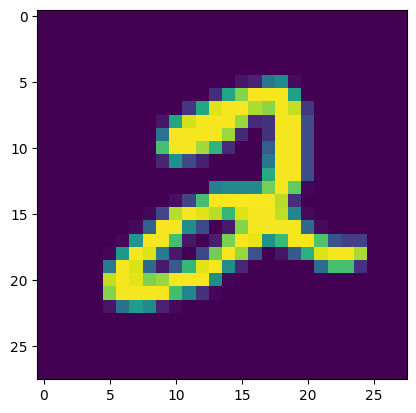

In [44]:
#Displaying the dataset
plt.imshow(x_train[5])
print (x_train[5])

### Step 3: Normalizing the images

In [45]:
# Normalizing grey images in range (0,1)
x_train = x_train/255
x_test = x_test/255

In [46]:
# Resizing image for convolution operation
img_size = 28
x_trainr = np.array(x_train).reshape(-1,img_size,img_size,1)
x_testr = np.array(x_test).reshape(-1,img_size,img_size,1)
print("Training samples dimention: ",x_trainr.shape)
print("Testing samples dimention: ",x_testr.shape)

Training samples dimention:  (60000, 28, 28, 1)
Testing samples dimention:  (10000, 28, 28, 1)


### Step 4: Create the Model using Convolution Layers

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

model = Sequential()

#First Convoluion Layer
model.add(Conv2D(64, (3,3), input_shape = x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

#Second Convoluion Layer
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

#Third Convoluion Layer
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu")) 
model.add(MaxPooling2D(pool_size = (2,2)))

#Fully Connected Layer
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

#Fully Connected Layer 2
model.add(Dense(32))
model.add(Activation("relu"))

#Last Fully Connected Layer
model.add(Dense(10))
model.add(Activation("softmax"))

In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 activation_6 (Activation)   (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_7 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                 

In [49]:
print("Total Training Samples: ",len(x_trainr))

Total Training Samples:  60000


### Step 5: Train the Convolution Layer Model

In [50]:
# Compile the model
model.compile(
    loss="sparse_categorical_crossentropy",  # Define the loss function for classification
    optimizer="adam",  # Specify the optimization algorithm (Adam optimizer)
    metrics=["accuracy"]  # Specify evaluation metric(s) (accuracy in this case)
)

#Train the model
model.fit(
    x_trainr,  # Training input data (features)
    y_train,  # Training target data (labels)
    epochs=5,  # Number of training epochs (iterations through the dataset)
    validation_split=0.2  # Fraction of training data used for validation
)

Epoch 1/5
1500/1500 [==============================] - 22s 14ms/step - loss: 0.2570 - accuracy: 0.9196 - val_loss: 0.0841 - val_accuracy: 0.9752
Epoch 2/5
1500/1500 [==============================] - 21s 14ms/step - loss: 0.0851 - accuracy: 0.9744 - val_loss: 0.0734 - val_accuracy: 0.9786
Epoch 3/5
1500/1500 [==============================] - 22s 14ms/step - loss: 0.0636 - accuracy: 0.9809 - val_loss: 0.0759 - val_accuracy: 0.9767
Epoch 4/5
1500/1500 [==============================] - 21s 14ms/step - loss: 0.0481 - accuracy: 0.9856 - val_loss: 0.0648 - val_accuracy: 0.9814
Epoch 5/5
1500/1500 [==============================] - 21s 14ms/step - loss: 0.0389 - accuracy: 0.9882 - val_loss: 0.0578 - val_accuracy: 0.9823


### Step 6: Check accuracy of the model

In [51]:
#Testing on dataset MNIT

test_loss, test_acc = model.evaluate(x_testr, y_test)
print("Test Loss on 10,000 test samples: ", test_loss)
print("Validation Acccuracy on 10,000 test samples: ", test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0621 - accuracy: 0.9803
Test Loss on 10,000 test samples:  0.062081750482320786
Validation Acccuracy on 10,000 test samples:  0.9803000092506409


In [52]:
# Use the trained model to make predictions on a set of test data (x_testr)
predictions = model.predict([x_testr])

# Print the predictions, which are typically a set of probabilities for each class
print(predictions)

313/313 [==============================] - 1s 4ms/step
[[1.87743499e-05 1.26722560e-04 3.22016596e-04 ... 9.99506474e-01
  1.60048774e-08 2.75187267e-06]
 [3.84213356e-03 2.06402605e-04 9.95610893e-01 ... 3.46155070e-06
  2.81877932e-04 1.06322659e-06]
 [3.41389568e-06 9.99787867e-01 2.33784758e-05 ... 1.22584843e-05
  3.35692093e-05 5.44829504e-07]
 ...
 [5.32910608e-12 1.10671035e-10 6.35494268e-10 ... 2.33266939e-09
  9.78689172e-07 4.38295388e-07]
 [8.65590409e-05 2.94478411e-07 6.80002401e-08 ... 1.63671299e-08
  7.83313590e-04 7.96676977e-06]
 [2.03371637e-05 5.50304435e-07 3.73698413e-06 ... 5.38618306e-09
  9.30201531e-06 4.08291179e-08]]


Predicted Number:  4


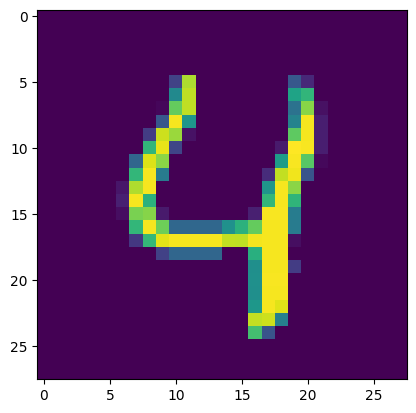

In [53]:
# Print the predicted class for the fifth sample in the predictions array
predicted_class = np.argmax(predictions[4])
print("Predicted Number: ",predicted_class)

# Display the corresponding image from the test data (assuming x_test contains the images)
plt.imshow(x_test[4])

In [54]:
# Save the CNN keras model
model.save("digit_recog_model.keras")

### Step 7: Test the model using Tkinter GUI

In [55]:
import tkinter as tk
from tkinter import Canvas, Button, Label
from PIL import Image, ImageDraw  

# Load your pre-trained Keras model
model = tf.keras.models.load_model('digit_recog_model.keras')

class DigitRecognizerApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Digit Recognizer")

        self.canvas = Canvas(root, width=280, height=280, bg="white")
        self.canvas.pack()
        self.canvas.bind("<Button-1>", self.start_draw)
        self.canvas.bind("<B1-Motion>", self.draw)

        self.predict_button = Button(root, text="Predict", command=self.predict)
        self.predict_button.pack()

        self.clear_button = Button(root, text="Clear", command=self.clear_canvas)
        self.clear_button.pack()

        self.result_label = Label(root, text="", font=("Helvetica", 24))
        self.result_label.pack()

        self.prev_x = None
        self.prev_y = None
        self.drawing = False
        self.image = Image.new("L", (280, 280), "white")

    def start_draw(self, event):
        self.prev_x = event.x
        self.prev_y = event.y
        self.drawing = True

    def draw(self, event):
        if self.drawing:
            x, y = event.x, event.y
            self.canvas.create_line((self.prev_x, self.prev_y, x, y), fill="black", width=15)
            self.image_draw = ImageDraw.Draw(self.image)
            self.image_draw.line((self.prev_x, self.prev_y, x, y), fill="black", width=15)
            self.prev_x = x
            self.prev_y = y

    def clear_canvas(self):
        self.canvas.delete("all")
        self.image = Image.new("L", (280, 280), "white")

    def predict(self):
        img = self.image.resize((28, 28), Image.BILINEAR)
        img = 255 - np.array(img)
        img = img.reshape(1, 28, 28, 1)
        img = img / 255.0

        predictions = model.predict(img)
        predicted_digit = np.argmax(predictions[0])
        confidence = np.max(predictions[0]) * 100

        self.result_label.config(text=f"Predicted Digit: {predicted_digit}\nConfidence: {confidence:.2f}%")

if __name__ == "__main__":
    root = tk.Tk()
    app = DigitRecognizerApp(root)
    root.mainloop()

1/1 [==============================] - 0s 14ms/step
